延用上週爬取的股價資料，完成本次作業要求：

1. 計算技術指標（SMA、RSI、MACD）

2. 可視化 K 線圖

3. 技術指標結合機器學習（線性回歸、決策樹、隨機森林）預測股價漲跌。使用技術指標作為特徵來預測第 n 天的股價

In [40]:
import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

In [52]:
stock_id = '2330'

date = "20240901"

# 取得證交所網站資料
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換為 JSON 格式
json_data = stock_data.json()

# 將 JSON 資料轉換成 DataFrame
df = pd.DataFrame(data=json_data['data'], columns=json_data['fields'])

# 將民國年轉換為西元年，並轉換為標準日期格式
def convert_minguo_to_gregorian(date_str):
    year, month, day = date_str.split('/')
    year = str(int(year) + 1911)  # 民國年轉換為西元年
    return f'{year}/{month}/{day}'

df['日期'] = df['日期'].apply(convert_minguo_to_gregorian)
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

# 轉換 '收盤價' 欄位為數字
df['收盤價'] = pd.to_numeric(df['收盤價'].str.replace(',', ''), errors='coerce')
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2024-09-02,"19,272,593","18,270,058,260",950.00,955.00,943.00,948.0,+4.00,"31,642"
1,2024-09-03,"23,205,623","21,908,471,541",948.00,952.00,939.00,940.0,-8.00,"47,139"
2,2024-09-04,"93,169,835","83,424,133,824",894.00,905.00,888.00,889.0,-51.00,"393,210"
3,2024-09-05,"34,147,890","30,998,595,394",907.00,915.00,900.00,902.0,+13.00,"63,902"
4,2024-09-06,"28,248,063","25,786,016,936",909.00,918.00,903.00,918.0,+16.00,"38,415"
5,2024-09-09,"38,448,946","34,456,838,126",892.00,900.00,891.00,899.0,-19.00,"102,365"
6,2024-09-10,"34,312,646","31,067,424,234",907.00,911.00,901.00,904.0,+5.00,"45,141"
7,2024-09-11,"19,513,256","17,621,000,956",906.00,906.00,900.00,901.0,-3.00,"30,789"
8,2024-09-12,"43,749,260","40,999,951,508",936.00,944.00,928.00,940.0,X0.00,"80,643"
9,2024-09-13,"28,307,441","26,795,862,243",955.00,955.00,939.00,947.0,+7.00,"39,071"


# SMA

In [42]:
# 計算簡單移動平均線 (SMA)
df['SMA_5'] = df['收盤價'].rolling(window=5).mean()  # 5日均線
df['SMA_20'] = df['收盤價'].rolling(window=20).mean()  # 20日均線
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,SMA_5,SMA_20
0,2024-09-02,"19,272,593","18,270,058,260",950.00,955.00,943.00,948.0,+4.00,"31,642",NaN,NaN
1,2024-09-03,"23,205,623","21,908,471,541",948.00,952.00,939.00,940.0,-8.00,"47,139",NaN,NaN
2,2024-09-04,"93,169,835","83,424,133,824",894.00,905.00,888.00,889.0,-51.00,"393,210",NaN,NaN
3,2024-09-05,"34,147,890","30,998,595,394",907.00,915.00,900.00,902.0,+13.00,"63,902",NaN,NaN
4,2024-09-06,"28,248,063","25,786,016,936",909.00,918.00,903.00,918.0,+16.00,"38,415",919.4,NaN
5,2024-09-09,"38,448,946","34,456,838,126",892.00,900.00,891.00,899.0,-19.00,"102,365",909.6,NaN
6,2024-09-10,"34,312,646","31,067,424,234",907.00,911.00,901.00,904.0,+5.00,"45,141",902.4,NaN
7,2024-09-11,"19,513,256","17,621,000,956",906.00,906.00,900.00,901.0,-3.00,"30,789",904.8,NaN
8,2024-09-12,"43,749,260","40,999,951,508",936.00,944.00,928.00,940.0,X0.00,"80,643",912.4,NaN
9,2024-09-13,"28,307,441","26,795,862,243",955.00,955.00,939.00,947.0,+7.00,"39,071",918.2,NaN


# RSI

In [43]:
# 計算 RSI (相對強弱指數)
def calculate_rsi(df, window=14):
    delta = df['收盤價'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI_14'] = calculate_rsi(df)
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,SMA_5,SMA_20,RSI_14
0,2024-09-02,"19,272,593","18,270,058,260",950.00,955.00,943.00,948.0,+4.00,"31,642",NaN,NaN,NaN
1,2024-09-03,"23,205,623","21,908,471,541",948.00,952.00,939.00,940.0,-8.00,"47,139",NaN,NaN,NaN
2,2024-09-04,"93,169,835","83,424,133,824",894.00,905.00,888.00,889.0,-51.00,"393,210",NaN,NaN,NaN
3,2024-09-05,"34,147,890","30,998,595,394",907.00,915.00,900.00,902.0,+13.00,"63,902",NaN,NaN,NaN
4,2024-09-06,"28,248,063","25,786,016,936",909.00,918.00,903.00,918.0,+16.00,"38,415",919.4,NaN,NaN
5,2024-09-09,"38,448,946","34,456,838,126",892.00,900.00,891.00,899.0,-19.00,"102,365",909.6,NaN,NaN
6,2024-09-10,"34,312,646","31,067,424,234",907.00,911.00,901.00,904.0,+5.00,"45,141",902.4,NaN,NaN
7,2024-09-11,"19,513,256","17,621,000,956",906.00,906.00,900.00,901.0,-3.00,"30,789",904.8,NaN,NaN
8,2024-09-12,"43,749,260","40,999,951,508",936.00,944.00,928.00,940.0,X0.00,"80,643",912.4,NaN,NaN
9,2024-09-13,"28,307,441","26,795,862,243",955.00,955.00,939.00,947.0,+7.00,"39,071",918.2,NaN,NaN


# MACD

In [45]:
# 計算 MACD (移動平均收斂背離)
exp1 = df['收盤價'].ewm(span=12, adjust=False).mean()
exp2 = df['收盤價'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,SMA_5,SMA_20,RSI_14,MACD,Signal
0,2024-09-02,"19,272,593","18,270,058,260",950.00,955.00,943.00,948.0,+4.00,"31,642",NaN,NaN,NaN,0.000000,0.000000
1,2024-09-03,"23,205,623","21,908,471,541",948.00,952.00,939.00,940.0,-8.00,"47,139",NaN,NaN,NaN,-0.638177,-0.127635
2,2024-09-04,"93,169,835","83,424,133,824",894.00,905.00,888.00,889.0,-51.00,"393,210",NaN,NaN,NaN,-5.199276,-1.141963
3,2024-09-05,"34,147,890","30,998,595,394",907.00,915.00,900.00,902.0,+13.00,"63,902",NaN,NaN,NaN,-7.676499,-2.448871
4,2024-09-06,"28,248,063","25,786,016,936",909.00,918.00,903.00,918.0,+16.00,"38,415",919.4,NaN,NaN,-8.253508,-3.609798
5,2024-09-09,"38,448,946","34,456,838,126",892.00,900.00,891.00,899.0,-19.00,"102,365",909.6,NaN,NaN,-10.127193,-4.913277
6,2024-09-10,"34,312,646","31,067,424,234",907.00,911.00,901.00,904.0,+5.00,"45,141",902.4,NaN,NaN,-11.080911,-6.146804
7,2024-09-11,"19,513,256","17,621,000,956",906.00,906.00,900.00,901.0,-3.00,"30,789",904.8,NaN,NaN,-11.941163,-7.305676
8,2024-09-12,"43,749,260","40,999,951,508",936.00,944.00,928.00,940.0,X0.00,"80,643",912.4,NaN,NaN,-9.367957,-7.718132
9,2024-09-13,"28,307,441","26,795,862,243",955.00,955.00,939.00,947.0,+7.00,"39,071",918.2,NaN,NaN,-6.686750,-7.511856


# SMA、RSI、MACD 可視化

<ipython-input-46-0203d4a2c206>:27: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  plt.tight_layout()
<ipython-input-46-0203d4a2c206>:27: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  plt.tight_layout()
<ipython-input-46-0203d4a2c206>:27: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
<ipython-input-46-0203d4a2c206>:27: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pac

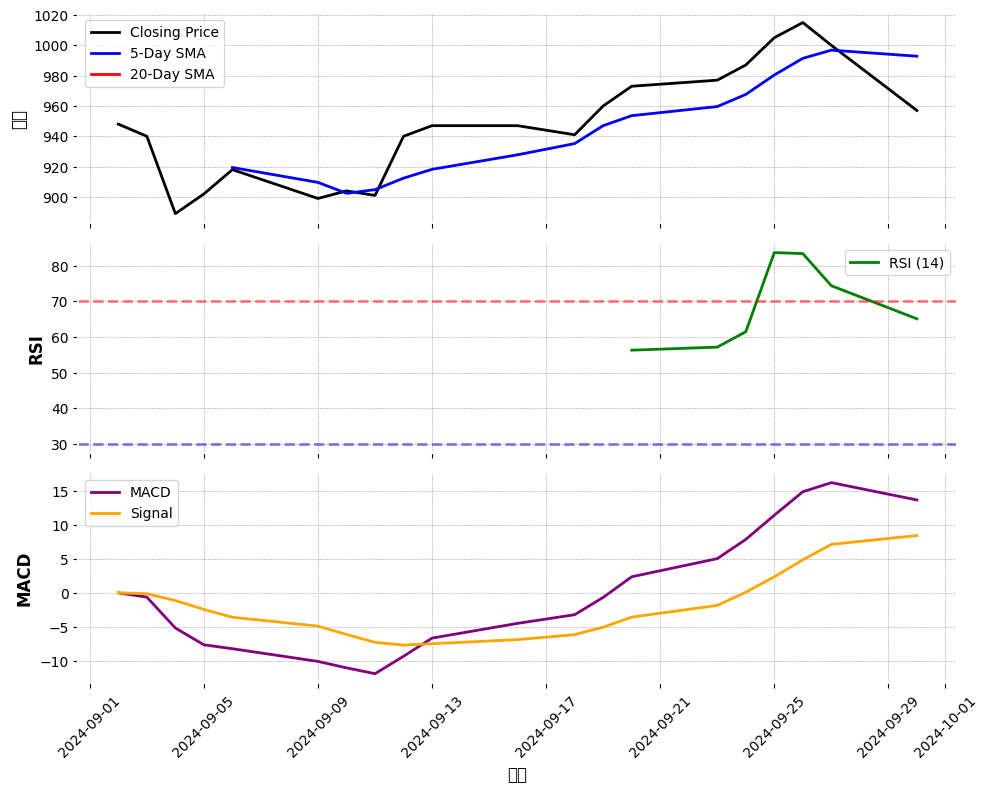

In [46]:
# 繪製 K 線圖及技術指標
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# K 線圖 (此處僅繪製收盤價)
ax1.plot(df['日期'], df['收盤價'], label='Closing Price', color='black')
ax1.plot(df['日期'], df['SMA_5'], label='5-Day SMA', color='blue')
ax1.plot(df['日期'], df['SMA_20'], label='20-Day SMA', color='red')
ax1.set_ylabel('價格')
ax1.legend()

# RSI 圖
ax2.plot(df['日期'], df['RSI_14'], label='RSI (14)', color='green')
ax2.axhline(70, linestyle='--', alpha=0.5, color='red')  # 超買區
ax2.axhline(30, linestyle='--', alpha=0.5, color='blue')  # 超賣區
ax2.set_ylabel('RSI')
ax2.legend()

# MACD 圖
ax3.plot(df['日期'], df['MACD'], label='MACD', color='purple')
ax3.plot(df['日期'], df['Signal'], label='Signal', color='orange')
ax3.set_ylabel('MACD')
ax3.legend()

# 設定日期顯示
plt.xticks(rotation=45)
plt.xlabel('日期')
plt.tight_layout()
plt.show()

# K線圖可視化

In [35]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00


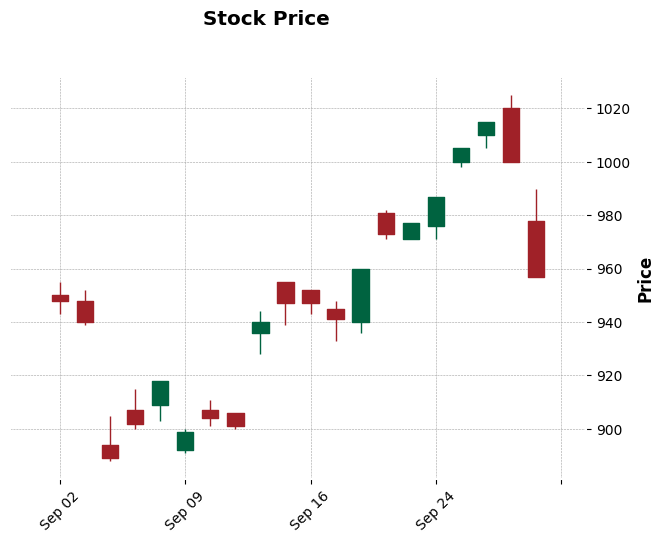

In [36]:
import mplfinance as mpf

# 股票代號
stock_id = '2330'

# 設定查詢月份，使用月份的第一天
date = "20240901"  # 查詢2024年9月份的資料

# 取得證交所網站資料
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換為 JSON 格式
json_data = stock_data.json()

# 將 JSON 資料轉換成 DataFrame
df = pd.DataFrame(data=json_data['data'], columns=json_data['fields'])

# 將民國年轉換為西元年，並轉換為標準日期格式
def convert_minguo_to_gregorian(date_str):
    year, month, day = date_str.split('/')
    year = str(int(year) + 1911)  # 民國年轉換為西元年
    return f'{year}/{month}/{day}'

df['日期'] = df['日期'].apply(convert_minguo_to_gregorian)
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

# 轉換數字欄位為正確格式
df['收盤價'] = pd.to_numeric(df['收盤價'].str.replace(',', ''), errors='coerce')
df['開盤價'] = pd.to_numeric(df['開盤價'].str.replace(',', ''), errors='coerce')
df['最高價'] = pd.to_numeric(df['最高價'].str.replace(',', ''), errors='coerce')
df['最低價'] = pd.to_numeric(df['最低價'].str.replace(',', ''), errors='coerce')

# 將 DataFrame 的列名稱重新命名以匹配 mplfinance 的要求
df = df.rename(columns={'日期': 'Date', '開盤價': 'Open', '最高價': 'High', '最低價': 'Low', '收盤價': 'Close'})

# 設置索引為日期，這是 mplfinance 繪製 K 線圖所需要的格式
df.set_index('Date', inplace=True)

# 繪製 K 線圖
mpf.plot(df, type='candle', style='charles', title='Stock Price', ylabel='Price', volume=False)

# 預測

In [104]:
# 定義從哪個月份開始抓取數據
start_year = 2024
start_month = 5

# 獲取當前日期，這樣可以設定查詢的終止月份
current_year = dt.date.today().year
current_month = dt.date.today().month

# 建立一個空的 DataFrame 來儲存所有月份的資料
all_data = pd.DataFrame()

# 循環遍歷每個月份，並抓取數據
for year in range(start_year, current_year + 1):
    # 確定循環的開始和結束月份
    month_start = start_month if year == start_year else 1
    month_end = current_month if year == current_year else 12

    for month in range(month_start, month_end + 1):
        # 格式化日期，格式為 YYYYMMDD（設定為該月的第一天）
        date_str = f"{year}{month:02d}01"

        # 抓取該月的股票數據
        stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date_str}&stockNo={stock_id}')
        json_data = stock_data.json()

        # 檢查 API 回傳的狀態是否成功
        if json_data['stat'] == 'OK':
            # 將該月的數據轉換為 DataFrame
            df = pd.DataFrame(data=json_data['data'], columns=json_data['fields'])

            # 民國年轉換為西元年
            def convert_minguo_to_gregorian(date_str):
                year, month, day = date_str.split('/')
                year = str(int(year) + 1911)
                return f'{year}/{month}/{day}'

            df['日期'] = df['日期'].apply(convert_minguo_to_gregorian)
            df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

            # 將數字格式的欄位轉換
            df['收盤價'] = pd.to_numeric(df['收盤價'].str.replace(',', ''), errors='coerce')
            df['開盤價'] = pd.to_numeric(df['開盤價'].str.replace(',', ''), errors='coerce')
            df['最高價'] = pd.to_numeric(df['最高價'].str.replace(',', ''), errors='coerce')
            df['最低價'] = pd.to_numeric(df['最低價'].str.replace(',', ''), errors='coerce')

            # 將該月的數據合併到 all_data 中
            all_data = pd.concat([all_data, df], ignore_index=True)

# 計算技術指標（SMA、RSI、MACD）
all_data['SMA_5'] = all_data['收盤價'].rolling(window=5).mean()  # 5日移動平均
all_data['SMA_20'] = all_data['收盤價'].rolling(window=20).mean()  # 20日移動平均
all_data['RSI_14'] = 100 - (100 / (1 + all_data['收盤價'].pct_change().rolling(window=14).apply(lambda x: (x[x > 0].mean() or 0) / -(x[x < 0].mean() or 0))))
all_data['MACD'] = all_data['收盤價'].ewm(span=12, adjust=False).mean() - all_data['收盤價'].ewm(span=26, adjust=False).mean()

# 移除含有 NaN 值的行
all_data.dropna(inplace=True)

# 顯示前幾行資料
all_data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,SMA_5,SMA_20,RSI_14,MACD
19,2024-05-29,"51,073,346","43,924,367,680",861.0,868.0,856.0,857.0,-8.00,"67,680",866.6,828.50,60.764436,22.541550
20,2024-05-30,"42,535,118","35,840,589,611",841.0,848.0,838.0,838.0,-19.00,"110,390",859.2,831.80,53.801248,20.014035
21,2024-05-31,"90,177,283","74,602,358,441",838.0,846.0,821.0,821.0,-17.00,"102,070",850.0,833.85,47.380522,16.449582
22,2024-06-03,"29,629,706","25,053,781,742",839.0,853.0,837.0,846.0,+25.00,"40,694",845.4,836.85,53.991467,15.463762
23,2024-06-04,"31,031,104","26,107,162,214",844.0,851.0,837.0,839.0,-7.00,"52,392",840.2,838.80,54.316777,13.956766


# 第一天的股價

Linear Regression MSE: 485.66538051319844
RandomForest Regression MSE: 503.1748000000004
XGBoost Regression MSE: 819.7934574006746
Polynomial Regression MSE (Degree 2): 1834.3530247906228


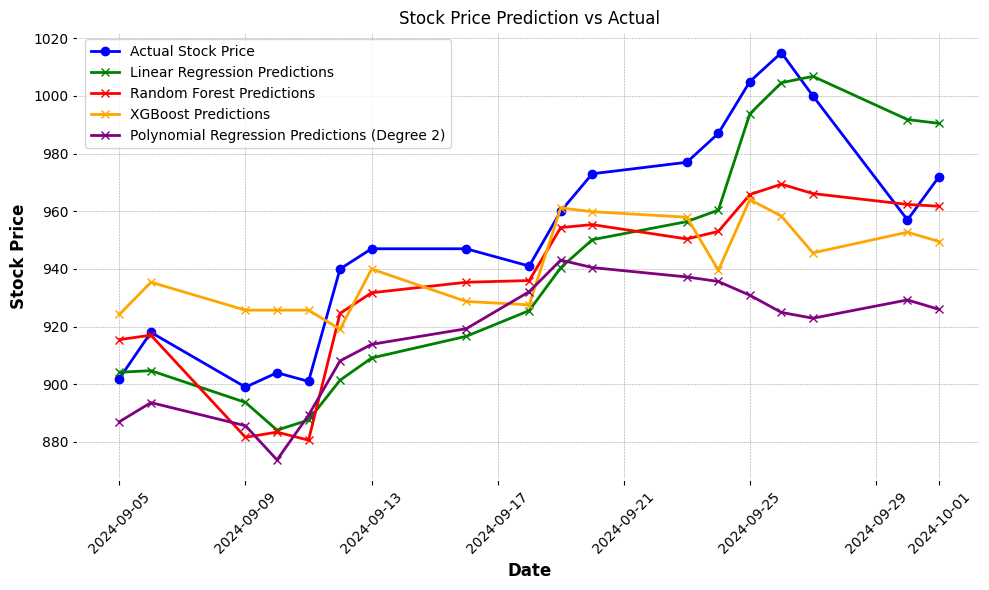

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# 提取日期
dates = all_data['日期']

# 提取特徵和標籤
features = ['SMA_5', 'SMA_20', 'RSI_14', 'MACD']
X = all_data[features]
y = all_data['收盤價']  # 使用實際的收盤價作為 y

# 分割訓練集和測試集，不打亂順序
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, random_state=42, shuffle=False)

# 使用機器學習模型進行訓練與預測
# 線性回歸模型
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, lr_predictions)
print(f'Linear Regression MSE: {mse}')

# 隨機森林回歸
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, rf_predictions)
print(f'RandomForest Regression MSE: {mse}')

#xgboost
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
xg_predictions = xg_reg.predict(X_test)
mse = mean_squared_error(y_test, xg_predictions)
print(f'XGBoost Regression MSE: {mse}')


# 多項式回歸
degree = 2  # 設定多項式的階數
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)
poly_predictions = poly_reg_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, poly_predictions)
print(f'Polynomial Regression MSE (Degree {degree}): {mse_poly}')

# 繪製實際值與預測值的對比圖
plt.figure(figsize=(10, 6))

# 使用測試集中的日期作為 x 軸
plt.plot(dates_test, y_test.values, label='Actual Stock Price', color='blue', marker='o')

# 線性回歸模型的預測值
plt.plot(dates_test, lr_predictions, label='Linear Regression Predictions', color='green', marker='x')

# 隨機森林模型的預測值
plt.plot(dates_test, rf_predictions, label='Random Forest Predictions', color='red', marker='x')

# XGBoost 模型的預測值
plt.plot(dates_test, xg_predictions, label='XGBoost Predictions', color='orange', marker='x')

# 多項式回歸模型的預測值
plt.plot(dates_test, poly_predictions, label=f'Polynomial Regression Predictions (Degree {degree})', color='purple', marker='x')

# 添加圖例、標題和軸標籤
plt.title('Stock Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# 格式化日期顯示
plt.xticks(rotation=45)
plt.tight_layout()

# 顯示圖表
plt.show()